In [1]:
import matplotlib.pyplot as plt

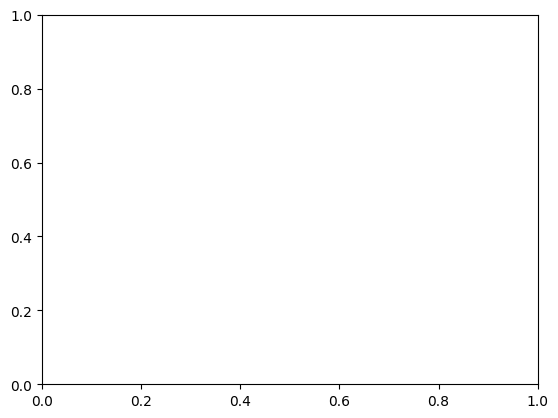

In [2]:
fig, ax = plt.subplots()
plt.show()  # Usa siempre este comando para que el gráfico aparezca


In [3]:
import pandas as pd
df = pd.read_csv('/home/facundo/Documents/Coding/IPIA_Python_1/Material de estudio/IPIA_C6_Python/Matplotlib/datasets/football_stats.csv', index_col='player_name')
print(df)

                     player_id  year  games  goals  npg  shots  assists  \
player_name                                                               
Ollie Watkins             8865  2020      9      6    5     22        1   
Jack Grealish              675  2020      9      5    5     26        5   
Ross Barkley               592  2020      6      2    2     17        1   
Tyrone Mings              1024  2020      9      2    2      7        1   
Ezri Konsa Ngoyo          7726  2020      9      2    2      7        0   
...                        ...   ...    ...    ...  ...    ...      ...   
Florian Hartherz          4267  2014     10      0    0      1        2   
Christian Strohdiek       4268  2014     22      0    0      6        0   
Idir Ouali                4311  2014      6      0    0      4        0   
Mirnes Pepic              4334  2014      2      0    0      0        0   
Thomas Bertels            4363  2014      1      0    0      0        0   

                     yel

In [4]:
# Filtrando datos del dataset entre 2014 y 2019
messi_goals = df.loc['Lionel Messi'].query('year < 2020')
ronaldo_goals = df.loc['Cristiano Ronaldo'].query('year < 2020')
cavani_goals = df.loc['Edinson Cavani'].query('year < 2020')

# Convertir las columnas de datos en arreglos de NumPy
messi_goals_year = messi_goals['year'].to_numpy()
messi_goals_goals = messi_goals['goals'].to_numpy()
ronaldo_goals_year = ronaldo_goals['year'].to_numpy()
ronaldo_goals_goals = ronaldo_goals['goals'].to_numpy()
cavani_goals_year = cavani_goals['year'].to_numpy()
cavani_goals_goals = cavani_goals['goals'].to_numpy()


print(messi_goals_year)
print (messi_goals_goals)



[2019 2018 2017 2016 2015 2014]
[25 36 34 37 26 43]


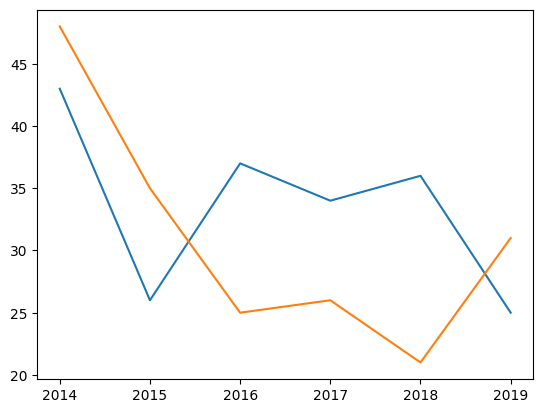

In [5]:
# Crear el gráfico
fig, ax = plt.subplots()
ax.plot(messi_goals_year, messi_goals_goals)
ax.plot(ronaldo_goals_year, ronaldo_goals_goals)
plt.show()

## Plot

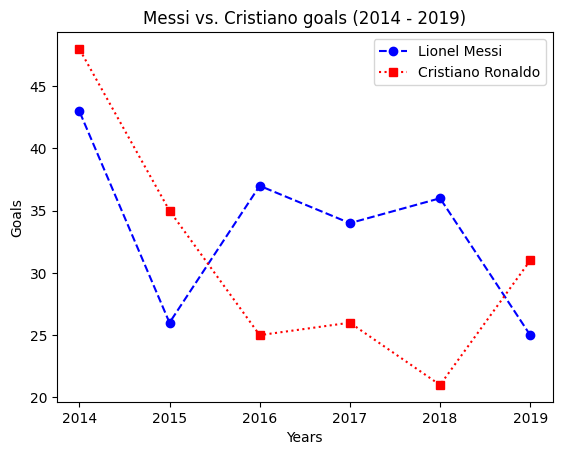

In [6]:
# (label) Titulo
fig, ax = plt.subplots()
ax.plot(messi_goals_year, messi_goals_goals,
        marker='o', color='b', linestyle='--', label='Lionel Messi')
ax.plot(ronaldo_goals_year, ronaldo_goals_goals,
        marker='s', color='r', linestyle='dotted', label='Cristiano Ronaldo')

ax.set(xlabel='Years', ylabel='Goals', title='Messi vs. Cristiano goals (2014 - 2019)')
ax.legend()


plt.show()

## SubPlots

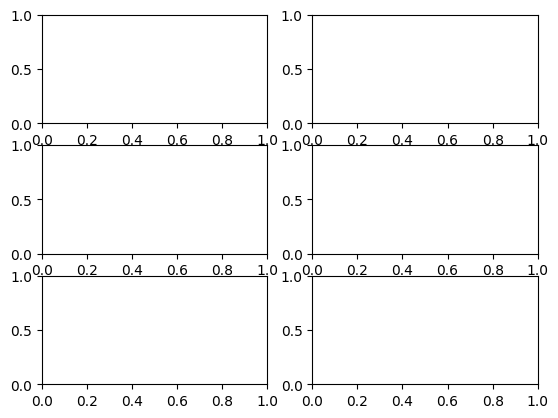

In [7]:
fig, ax = plt.subplots(3, 2)  # matriz 3 × 2
plt.show()


In [8]:
# Convertir las columnas de datos en arreglos de NumPy
messi_goals_npg = messi_goals['npg'].to_numpy()
ronaldo_goals_npg = ronaldo_goals['npg'].to_numpy()
cavani_goals_npg = cavani_goals['npg'].to_numpy()


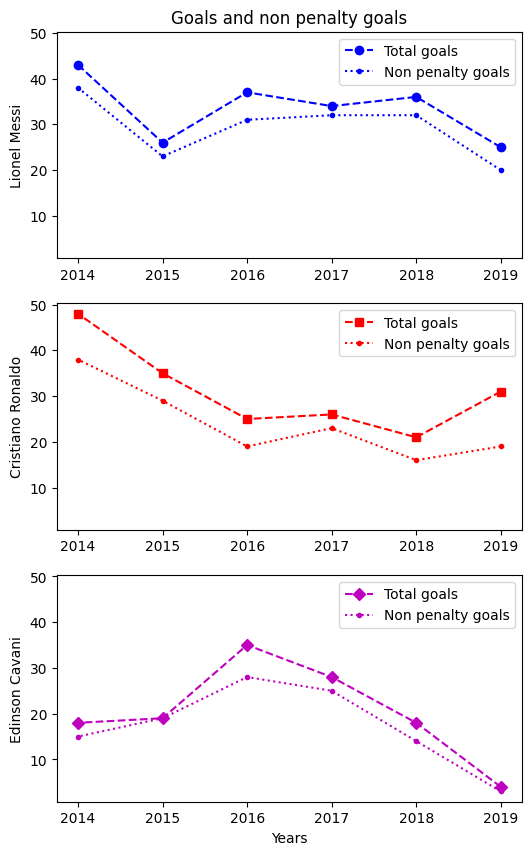

In [9]:
fig, ax = plt.subplots(3, 1, sharey=True, figsize=[6, 10])

ax[0].plot(messi_goals_year, messi_goals_goals,
        marker='o', color='b', linestyle='--', label='Total goals')
ax[0].plot(messi_goals_year, messi_goals_npg, marker='.',
        color='b', linestyle='dotted', label='Non penalty goals')
ax[1].plot(ronaldo_goals_year, ronaldo_goals_goals,
        marker='s', color='r', linestyle='--', label='Total goals')
ax[1].plot(ronaldo_goals_year, ronaldo_goals_npg, marker='.',
        color='r', linestyle='dotted', label='Non penalty goals')
ax[2].plot(cavani_goals_year, cavani_goals_goals,
        marker='D', color='m', linestyle='--', label='Total goals')
ax[2].plot(cavani_goals_year, cavani_goals_npg, marker='.',
        color='m', linestyle='dotted', label='Non penalty goals')


ax[0].set_title('Goals and non penalty goals')
ax[0].set_ylabel('Lionel Messi')
ax[1].set_ylabel('Cristiano Ronaldo')
ax[2].set_ylabel('Edinson Cavani')
ax[2].set_xlabel('Years')
ax[0].legend()
ax[1].legend()
ax[2].legend()
plt.show()


## Gráficos de barras

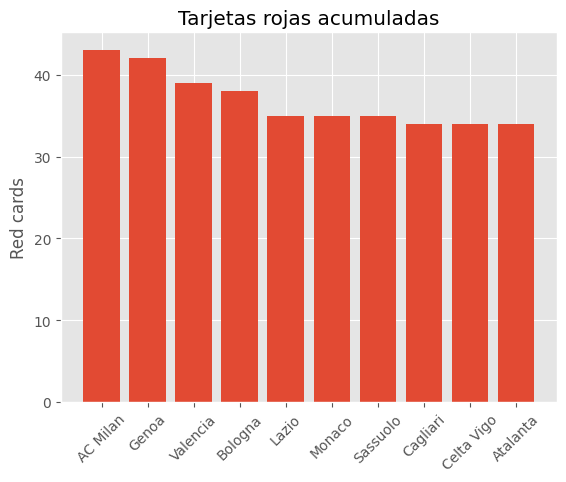

In [10]:
#Descubramos los 10 equipos con más tarjetas rojas acumuladas:
# Datos de tarjetas rojas por equipo
top_red_cards = df.groupby('team_name')['red_cards'].sum() \
                .sort_values(ascending=False).head(10)
# Plot
plt.style.use('ggplot')
plt.bar(top_red_cards.index, top_red_cards)
plt.xticks(rotation=45)
plt.title('Tarjetas rojas acumuladas')
plt.ylabel('Red cards')
plt.show()


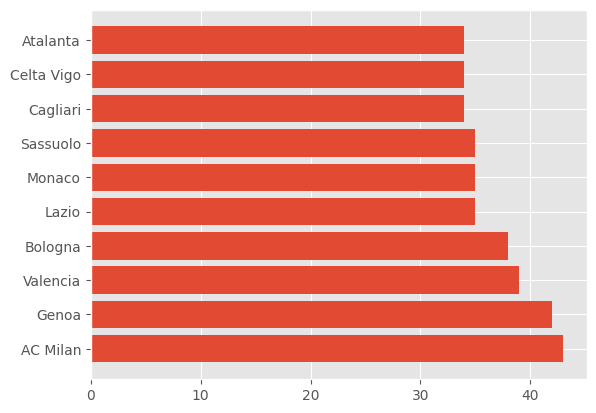

In [11]:
# horizontal

plt.barh(top_red_cards.index, top_red_cards)

plt.show()

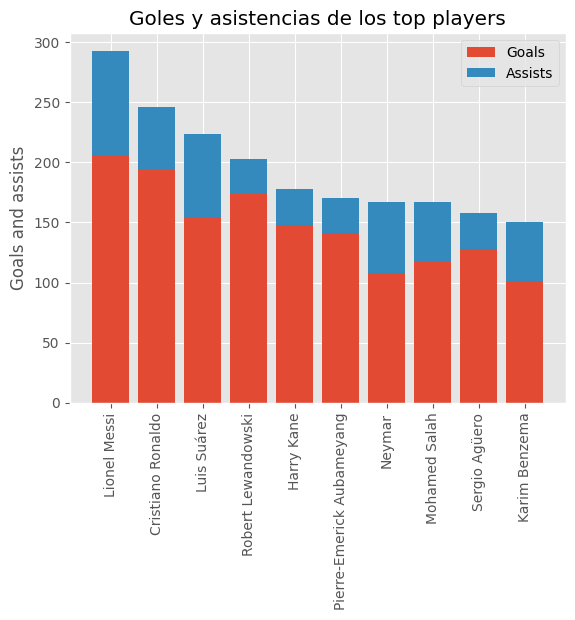

In [12]:
# Filter
df['goals_assists'] = df.goals + df.assists
top_players = df.groupby('player_name')[['goals', 'assists', 'goals_assists']].sum() \
                .sort_values('goals_assists', ascending=False).head(10)

# Plot
plt.bar(top_players.index, top_players.goals, label='Goals')
plt.bar(top_players.index, top_players.assists, label='Assists', bottom=top_players.goals)
plt.xticks(rotation=90)
plt.title('Goles y asistencias de los top players')
plt.ylabel('Goals and assists')
plt.legend()
plt.show()


## Histogramas

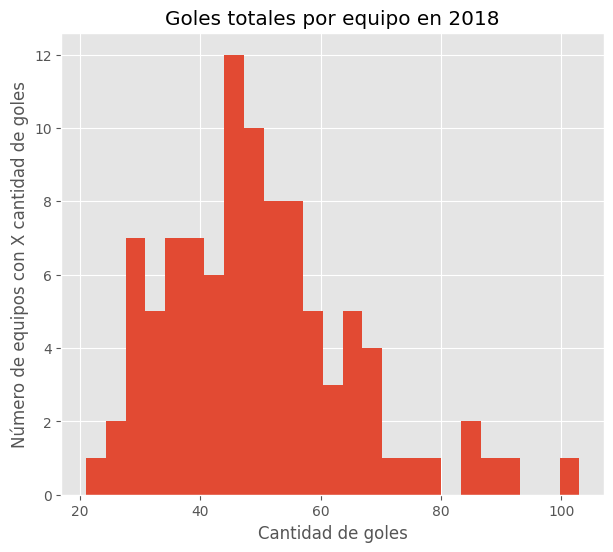

In [13]:
# Goles totales por equipo en 2018
df_2018 = df.query('year == 2018')
team_goals_2018 = df_2018.groupby('team_name')['goals'].sum()

# Plot
plt.figure(figsize=[7, 6]) # 7 in de ancho y 6 in de alto
plt.hist(team_goals_2018, bins=25)
plt.title('Goles totales por equipo en 2018')
plt.xlabel('Cantidad de goles')
plt.ylabel('Número de equipos con X cantidad de goles')
plt.show()


## Gráficos de dispersión o scatter plots

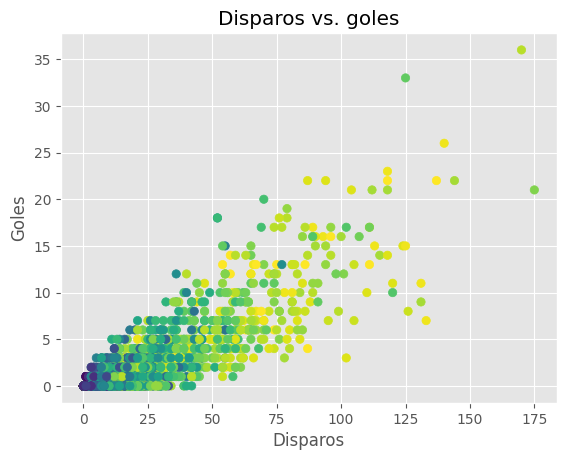

In [14]:
plt.scatter(df_2018.shots, df_2018.goals, c=df_2018.games)
plt.title('Disparos vs. goles')
plt.xlabel('Disparos')
plt.ylabel('Goles')
plt.show()


In [15]:
# Código para guardar una figura de 5 × 3 pulgadas
fig.set_size_inches([5, 10])
fig.savefig('figure_5_10.png')


## Loading images:¶

Una imagen en color se puede representar como una matriz N x M x 3 correspondiente a N filas, M columnas y 3 canales o colores para la representación RGB roja, verde y azul. También podría ser de 4 canales debido al canal de transparencia alfa con una notación N x M x 4.

In [16]:
import matplotlib.image as mpimg

In [17]:
img=mpimg.imread('figure_5_10.png')
img.shape

(1000, 500, 4)

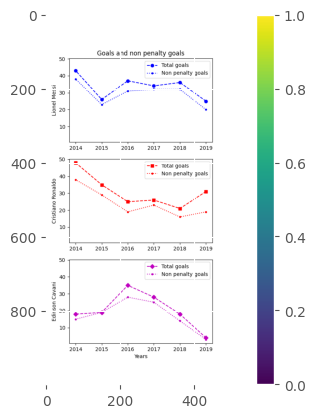

In [18]:
# imshow: Showing picture
plt.imshow(img)
plt.colorbar()